In [868]:
from glob import glob
import pandas as pd
import re

In [869]:
agg_df = pd.DataFrame()
for path in glob("../output/**/results.json", recursive=True):
    df = pd.read_json(path).transpose()
    df.columns = ["TEACOS_output", "ABM_output"]
    # Add 0, 0 as top row and reset index
    # df = pd.concat([pd.DataFrame([[0, 0]], columns=df.columns), df]).reset_index(drop=True)
    df['TEACOS_output'] = df['TEACOS_output'].apply(lambda x: x/3.6)
    # Extract the number of iterations with regex
    iterations = int(re.search(r"Iterations_(.*)_Time", path).group(1))

    # Extract test name (e.g. Tholen) with regex
    test_name = re.search(r"output/(.*)_Iterations", path).group(1)

    # Add the date, iteration, and test name to the dataframe
    df["iterations"] = iterations
    df["test_name"] = test_name
    df["path"] = path

    agg_df = pd.concat([agg_df, df])

agg_df["iter"] = agg_df.index
agg_df = agg_df.reset_index(drop=True)
agg_df

,TEACOS_output,ABM_output,iterations,test_name,path,iter
0,2000.0,0.000000,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,0
1,2000.0,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,1
2,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,2
3,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,3
4,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,4
...,...,...,...,...,...,...
925,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,5
926,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,6
927,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,7
928,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,8


In [870]:
_path = glob("../output/**/results.json", recursive=True)[0]

_df = pd.read_json(_path).transpose()
# Add 0, 0 as top row and reset index
_df = pd.concat([pd.DataFrame([[0, 0]], columns=_df.columns), _df]).reset_index(drop=True)
_df

,0,1
0,0.0,0.000000
1,7200.0,0.000000
2,7200.0,2436.339355
3,NaN,2436.339355
4,NaN,2436.339355
5,NaN,2436.339355


In [871]:
"""
Dataset is described as follows:

TEACOS_output     ABM_output   iterations         iter  iter_lowest
count     741.000000    1066.000000  1066.000000  1066.000000   755.000000
mean    33611.635927  105478.840381    14.654784     6.827392    10.536424
std     19753.465180  129978.313418     7.903821     6.217214     6.833347
min         0.000000       0.000000     1.000000     0.000000     1.000000
25%     10000.000000    2436.339355    10.000000     2.000000     4.000000
50%     49000.000000   10846.085550    10.000000     5.000000     8.000000
75%     50000.000000  228168.539908    25.000000     9.000000    17.000000
max     50000.000000  437687.091930    25.000000    24.000000    22.000000

Columns:
TEACOS_output: The output of TEACOS (in W)
ABM_output: The output of the ABM (in W)
iterations: The number of iterations that were run in a full replication
iter: The iteration number of the current row inside a full replication
iter_lowest: The lowest iteration number that has a NaN value in TEACOS_output
"""

'\nDataset is described as follows:\n\nTEACOS_output     ABM_output   iterations         iter  iter_lowest\ncount     741.000000    1066.000000  1066.000000  1066.000000   755.000000\nmean    33611.635927  105478.840381    14.654784     6.827392    10.536424\nstd     19753.465180  129978.313418     7.903821     6.217214     6.833347\nmin         0.000000       0.000000     1.000000     0.000000     1.000000\n25%     10000.000000    2436.339355    10.000000     2.000000     4.000000\n50%     49000.000000   10846.085550    10.000000     5.000000     8.000000\n75%     50000.000000  228168.539908    25.000000     9.000000    17.000000\nmax     50000.000000  437687.091930    25.000000    24.000000    22.000000\n\nColumns:\nTEACOS_output: The output of TEACOS (in W)\nABM_output: The output of the ABM (in W)\niterations: The number of iterations that were run in a full replication\niter: The iteration number of the current row inside a full replication\niter_lowest: The lowest iteration numbe

In [872]:
# Get for each 'path' group the lowest value of 'iter' that has a value of NaN in 'TEACOS_output'

# Get the rows where TEACOS_output is NaN
nan_rows = agg_df[agg_df["TEACOS_output"].isna()]

# Get the lowest value of 'iter' for each 'path' group
lowest_iter = nan_rows.groupby("path")["iter"].min()
lowest_iter

path
../output/Pand van Allied Mineral Products Europe B.V._Iterations_10_Time_2023-06-03T16:29:55.591716/results.json                                                                                                                       7
../output/Pand van Allied Mineral Products Europe B.V._Iterations_10_Time_2023-06-03T16:48:05.014497/results.json                                                                                                                       8
../output/Pand van Allied Mineral Products Europe B.V._Iterations_10_Time_2023-06-03T21:13:47.118105/results.json                                                                                                                       7
../output/Pand van Allied Mineral Products Europe B.V._Iterations_10_Time_2023-06-03T21:22:06.521522/results.json                                                                                                                       8
../output/Pand van Holonite B.V._Iterations_10_Time_2023-06

In [873]:
# Join the lowest iteration number to the original dataframe
agg_df = agg_df.join(lowest_iter, on="path", rsuffix="_lowest")

agg_df

,TEACOS_output,ABM_output,iterations,test_name,path,iter,iter_lowest
0,2000.0,0.000000,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,0,2.0
1,2000.0,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,1,2.0
2,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,2,2.0
3,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,3,2.0
4,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,4,2.0
...,...,...,...,...,...,...,...
925,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,5,1.0
926,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,6,1.0
927,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,7,1.0
928,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,8,1.0


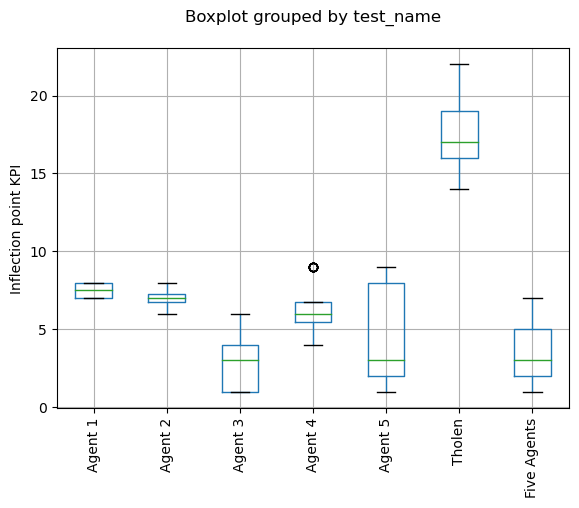

In [874]:
from matplotlib import pyplot as plt

# Create new dataframe without NaN values in lowest_iter
result_df = agg_df[~agg_df["iter_lowest"].isna()]

# Filter out the test_name's that have a count less than 3
result_df = result_df.groupby("path").filter(lambda x: len(x) >= 3)

# Create a box plot of the lowest iteration number for each test_name
result_df.boxplot(column="iter_lowest", by="test_name", rot=90)

labels = [label.get_text() for label in plt.gca().get_xticklabels()]

# Adjust the tick labels as desired
new_labels = ['Agent 1', 'Agent 2', 'Agent 3', 'Agent 4', 'Agent 5', 'Tholen', "Five Agents"]  # Replace with your desired labels

# Set the adjusted tick labels
plt.gca().set_xticklabels(new_labels)
plt.xlabel("")
plt.ylabel("Inflection point KPI")
plt.title("")
plt.savefig("../figures/boxplot.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()


In [875]:
result_df.groupby("path").count()

,TEACOS_output,ABM_output,iterations,test_name,iter,iter_lowest
path,,,,,,
../output/Pand van Allied Mineral Products Europe B.V._Iterations_10_Time_2023-06-03T16:29:55.591716/results.json,7,10,10,10,10,10
../output/Pand van Allied Mineral Products Europe B.V._Iterations_10_Time_2023-06-03T16:48:05.014497/results.json,8,10,10,10,10,10
../output/Pand van Allied Mineral Products Europe B.V._Iterations_10_Time_2023-06-03T21:13:47.118105/results.json,7,10,10,10,10,10
../output/Pand van Allied Mineral Products Europe B.V._Iterations_10_Time_2023-06-03T21:22:06.521522/results.json,8,10,10,10,10,10
../output/Pand van Holonite B.V._Iterations_10_Time_2023-06-03T22:21:11.866846/results.json,7,10,10,10,10,10
../output/Pand van Holonite B.V._Iterations_10_Time_2023-06-03T22:36:52.157834/results.json,8,10,10,10,10,10
../output/Pand van Holonite B.V._Iterations_10_Time_2023-06-03T22:51:31.493947/results.json,7,10,10,10,10,10
../output/Pand van Holonite B.V._Iterations_10_Time_2023-06-03T23:24:06.951974/results.json,6,10,10,10,10,10
"../output/Pand van PumpCare Benelux B.V., Machinale houtbewerking Mark van den Enden, Ampati, Schildersbedrijf van Oeveren B.V., Caleidos Cosmetics, Chat Gris B.V._Solo_Iterations_10_Time_2023-06-03T23:32:08.277707/results.json",2,10,10,10,10,10


In [876]:
cv_df = agg_df.query("(iter == 1) & (test_name == 'Tholen')")
# cv_df = cv_df.query("iterations == 25")
cv_df = cv_df[~cv_df["iter_lowest"].isna()]

cv_df["iter_lowest"].std(), cv_df["iter_lowest"].mean()

# Calculate coefficient of variation
cv_df["iter_lowest"].std() / cv_df["iter_lowest"].mean()

0.1306737975654869

In [877]:
cv_df.query("iterations == 25")

,TEACOS_output,ABM_output,iterations,test_name,path,iter,iter_lowest
81,50000.0,72663.932396,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,16.0
106,50000.0,89480.110368,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,1,17.0
171,50000.0,75493.724425,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,15.0
226,50000.0,93630.983247,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,14.0
291,50000.0,79539.905385,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,17.0
331,50000.0,81894.786449,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,1,22.0
446,50000.0,77764.782268,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,18.0
471,50000.0,86178.336321,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,18.0
496,50000.0,98687.081515,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,19.0
531,50000.0,78164.614274,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-05...,1,21.0


In [878]:
# Calculate cv in a cumulative way (i.e. for 2 test runs, 3 test runs, etc)
cv_df = agg_df.query("(iter == 1) & (test_name == 'Tholen')")
cv_df = cv_df[~cv_df["iter_lowest"].isna()]
arrTEACOS = []
arrABM = []

for i in range(2, len(cv_df) + 1):
    print(f"CV for {i} test runs: {cv_df.iloc[:i]['iter_lowest'].std() / cv_df.iloc[:i]['iter_lowest'].mean()}")
    arrTEACOS.append(cv_df.iloc[:i]['iter_lowest'].std() / cv_df.iloc[:i]['iter_lowest'].mean())
    arrABM.append(cv_df.iloc[:i]['ABM_output'].std() / cv_df.iloc[:i]['ABM_output'].mean())

print(arrTEACOS, arrABM)

CV for 2 test runs: 0.04285495643554834
CV for 3 test runs: 0.0625
CV for 4 test runs: 0.0832899644345681
CV for 5 test runs: 0.08252154943294492
CV for 6 test runs: 0.16555687101844344
CV for 7 test runs: 0.15188169985127126
CV for 8 test runs: 0.14110723523701582
CV for 9 test runs: 0.13530045461029125
CV for 10 test runs: 0.14105448821901323
CV for 11 test runs: 0.14348934702037408
CV for 12 test runs: 0.13731610312615017
CV for 13 test runs: 0.1329364669201088
CV for 14 test runs: 0.1306737975654869
[0.04285495643554834, 0.0625, 0.0832899644345681, 0.08252154943294492, 0.16555687101844344, 0.15188169985127126, 0.14110723523701582, 0.13530045461029125, 0.14105448821901323, 0.14348934702037408, 0.13731610312615017, 0.1329364669201088, 0.1306737975654869] [0.1466700012519101, 0.11366628399365213, 0.1243281903234404, 0.10998657602406621, 0.09843722990409288, 0.09276891754998638, 0.08762797434895077, 0.10381155531992504, 0.10094598706157681, 0.0977232558843747, 0.09561054019716345, 0.09

In [879]:
cv_df

,TEACOS_output,ABM_output,iterations,test_name,path,iter,iter_lowest
81,50000.0,72663.932396,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,16.0
106,50000.0,89480.110368,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,1,17.0
171,50000.0,75493.724425,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,15.0
226,50000.0,93630.983247,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,14.0
291,50000.0,79539.905385,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,17.0
331,50000.0,81894.786449,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,1,22.0
446,50000.0,77764.782268,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,18.0
471,50000.0,86178.336321,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,18.0
496,50000.0,98687.081515,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,19.0
531,50000.0,78164.614274,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-05...,1,21.0


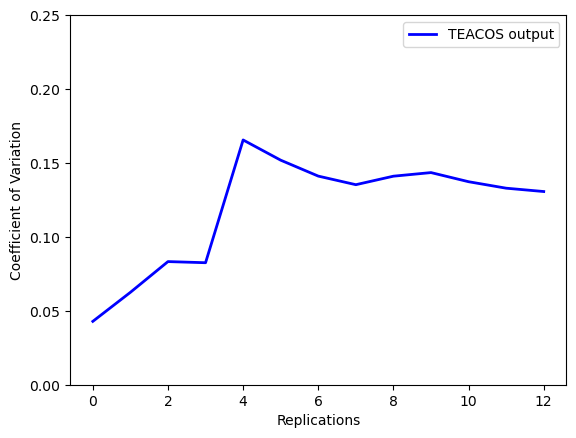

In [880]:
import matplotlib.pyplot as plt

def create_line_chart(data):
    x = range(len(data))
    y = data

    plt.plot(x, y, color='blue', linestyle='solid', linewidth=2, label = "TEACOS output")
    plt.xlabel('Replications')
    plt.ylabel('Coefficient of Variation')
    plt.ylim(0, 0.25)  # Set the limits of the y-axis
    plt.legend()
    plt.savefig("CV.png")
    plt.show()

# Create the line chart
create_line_chart(arrTEACOS)

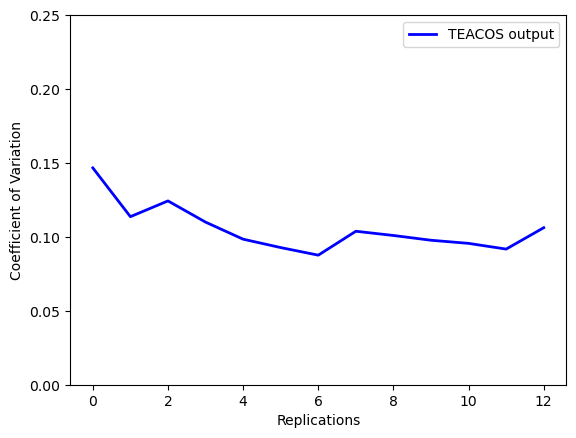

In [881]:
create_line_chart(arrABM)

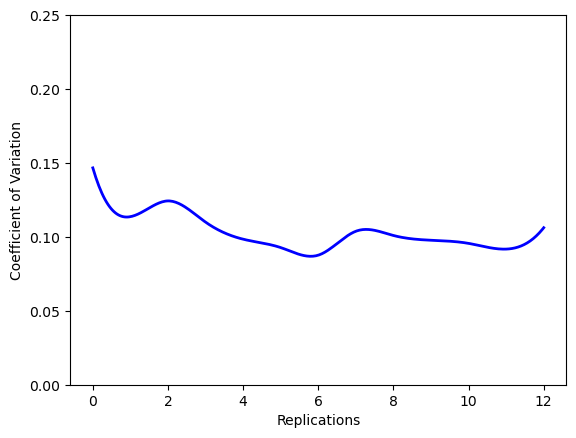

In [882]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def create_line_chart(data):
    x = np.arange(len(data))
    y = np.array(data)

    # Apply cubic spline interpolation for smoothing
    x_smooth = np.linspace(x.min(), x.max(), 300)
    spline = make_interp_spline(x, y)
    y_smooth = spline(x_smooth)

    plt.plot(x_smooth, y_smooth, color='blue', linestyle='solid', linewidth=2)
    plt.xlabel('Replications')
    plt.ylabel('Coefficient of Variation')
    plt.ylim(0, 0.25)  # Set the limits of the y-axis

    plt.show()

# Example array of data
data = [0.05, 0.1, 0.15, 0.2, 0.25]

# Create the line chart with a smoothed line
create_line_chart(arrABM)

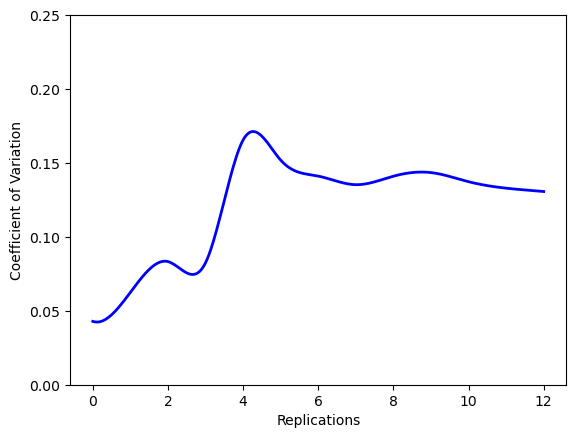

In [883]:
create_line_chart(arrTEACOS)

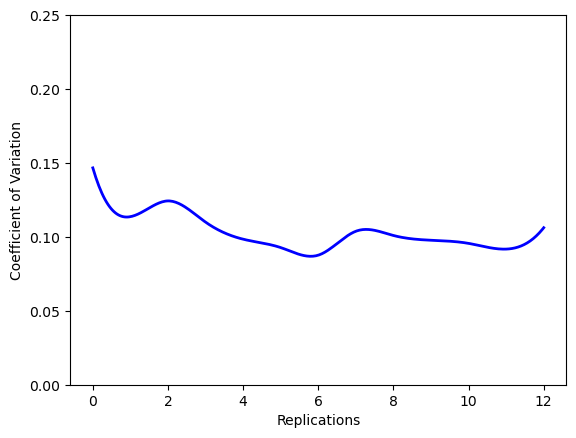

In [884]:
create_line_chart(arrABM)

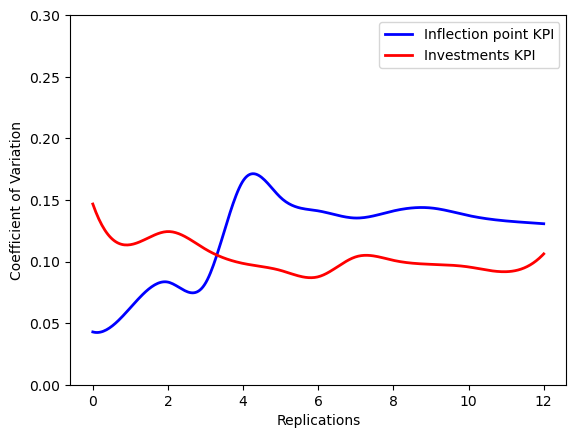

In [885]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def create_line_chart(data1, data2):
    x1 = np.arange(len(data1))
    y1 = np.array(data1)

    x2 = np.arange(len(data2))
    y2 = np.array(data2)

    # Apply cubic spline interpolation for smoothing
    x1_smooth = np.linspace(x1.min(), x1.max(), 300)
    spline1 = make_interp_spline(x1, y1)
    y1_smooth = spline1(x1_smooth)

    x2_smooth = np.linspace(x2.min(), x2.max(), 300)
    spline2 = make_interp_spline(x2, y2)
    y2_smooth = spline2(x2_smooth)

    plt.plot(x1_smooth, y1_smooth, color='blue', linestyle='solid', linewidth=2, label='Inflection point KPI')
    plt.plot(x2_smooth, y2_smooth, color='red', linestyle='solid', linewidth=2, label='Investments KPI')
    plt.xlabel('Replications')
    plt.ylabel('Coefficient of Variation')
    plt.ylim(0, 0.30)  # Set the limits of the y-axis
    plt.legend()
    plt.savefig("CV.png")
    plt.show()

# Create the combined smoothened line chart
create_line_chart(arrTEACOS, arrABM)

In [886]:
agg_df

,TEACOS_output,ABM_output,iterations,test_name,path,iter,iter_lowest
0,2000.0,0.000000,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,0,2.0
1,2000.0,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,1,2.0
2,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,2,2.0
3,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,3,2.0
4,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,4,2.0
...,...,...,...,...,...,...,...
925,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,5,1.0
926,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,6,1.0
927,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,7,1.0
928,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,8,1.0


In [887]:
# Create a new column, which checks per path what the difference is between each subsequent pair of ABM output
agg_df["ABM_output"]


0         0.000000
1      2436.339355
2      2436.339355
3      2436.339355
4      2436.339355
          ...     
925    2436.339355
926    2436.339355
927    2436.339355
928    2436.339355
929    2436.339355
Name: ABM_output, Length: 930, dtype: float64

In [888]:
agg_df

,TEACOS_output,ABM_output,iterations,test_name,path,iter,iter_lowest
0,2000.0,0.000000,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,0,2.0
1,2000.0,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,1,2.0
2,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,2,2.0
3,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,3,2.0
4,NaN,2436.339355,5,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,4,2.0
...,...,...,...,...,...,...,...
925,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,5,1.0
926,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,6,1.0
927,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,7,1.0
928,NaN,2436.339355,10,Pand van U Tube Systems B.V.,../output/Pand van U Tube Systems B.V._Iterati...,8,1.0


In [889]:
selected_rows = agg_df[(agg_df['test_name'] == "Tholen") & (agg_df['iterations'] == 25)]

new_df = selected_rows
new_df

,TEACOS_output,ABM_output,iterations,test_name,path,iter,iter_lowest
80,50000.0,45130.706694,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,0,16.0
81,50000.0,72663.932396,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,16.0
82,50000.0,111635.893273,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,2,16.0
83,50000.0,143987.205801,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,3,16.0
84,50000.0,164296.592727,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,4,16.0
...,...,...,...,...,...,...,...
785,NaN,340977.822484,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,20,16.0
786,NaN,340977.822484,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,21,16.0
787,NaN,340977.822484,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,22,16.0
788,NaN,340977.822484,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,23,16.0


In [890]:
# Create a new dataframe that removes all rows in which the TEACOS_ouput column is empty

cleaned_df = new_df[~new_df["TEACOS_output"].isna()]
cleaned_df

,TEACOS_output,ABM_output,iterations,test_name,path,iter,iter_lowest
80,50000.0,45130.706694,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,0,16.0
81,50000.0,72663.932396,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,16.0
82,50000.0,111635.893273,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,2,16.0
83,50000.0,143987.205801,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,3,16.0
84,50000.0,164296.592727,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,4,16.0
...,...,...,...,...,...,...,...
776,50000.0,295874.753319,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,11,16.0
777,50000.0,308562.470907,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,12,16.0
778,50000.0,317089.658650,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,13,16.0
779,50000.0,330461.073590,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,14,16.0


In [891]:
average_value = new_df[new_df['iter'] == 0]['ABM_output'].mean()
print(average_value)

45562.73630120612


In [892]:
# Change all nan values in dataframe to 0 for Teacos output
new_df['TEACOS_output'].fillna(0)

80     50000.0
81     50000.0
82     50000.0
83     50000.0
84     50000.0
        ...   
785        0.0
786        0.0
787        0.0
788        0.0
789        0.0
Name: TEACOS_output, Length: 350, dtype: float64

In [893]:
iteration = [0]
envelope_max = [0]
envelope_min = [0]
abm_value = [0]

for i in range(1,24):
    iteration.append(i)
    envelope_max.append(new_df[new_df['iter'] == i]['TEACOS_output'].mean())
    abm_value.append(new_df[new_df['iter'] == i - 1]['ABM_output'].mean())
    # envelope_min.append(abm_value[i - 1])
    iteration.append(i)
    envelope_max.append(new_df[new_df['iter'] == i - 1]['ABM_output'].mean())
    abm_value.append(new_df[new_df['iter'] == i - 1]['ABM_output'].mean())
    # envelope_min.append(new_df[new_df['iter'] == i]['ABM_output'].mean())

iteration, envelope_max, abm_value, envelope_min

([0,
  1,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  5,
  5,
  6,
  6,
  7,
  7,
  8,
  8,
  9,
  9,
  10,
  10,
  11,
  11,
  12,
  12,
  13,
  13,
  14,
  14,
  15,
  15,
  16,
  16,
  17,
  17,
  18,
  18,
  19,
  19,
  20,
  20,
  21,
  21,
  22,
  22,
  23,
  23],
 [0,
  50000.0,
  45562.73630120612,
  50000.0,
  82453.09908328242,
  50000.0,
  112279.44016204528,
  50000.0,
  138146.70484083908,
  50000.0,
  159656.99949547672,
  50000.0,
  180346.27692838528,
  50000.0,
  200634.05758283995,
  50000.0,
  218626.1507525513,
  50000.0,
  235261.41093572226,
  50000.0,
  247721.97826430132,
  50000.0,
  262375.73192197835,
  50000.0,
  275558.78119406354,
  50000.0,
  287494.91139970924,
  50000.0,
  299845.33204155404,
  50000.0,
  311579.0232010675,
  50000.0,
  319187.608199695,
  50000.0,
  325528.84115023585,
  50000.0,
  329907.16800224513,
  50000.0,
  333320.3031458181,
  50000.0,
  334679.2727163277,
  50000.0,
  335723.4181541856,
  nan,
  336245.49087311456,
  nan,
  336245.49

In [894]:
testdf = pd.DataFrame({
    'iteration': iteration,
    'envelope_max': envelope_max,
    'abm_value': abm_value
})

In [895]:
new_max = [0]
for i in range(1, len(testdf["iteration"])):
    if i % 2 == 0:
        # print(testdf["envelope_max"][i])
        new_max.append(testdf["envelope_max"][i])
    if i % 2 == 1:  # Check if the index is odd
        # print(testdf["envelope_max"][i])
        c_sum = testdf["envelope_max"][i] + testdf["envelope_max"][i-1]
        new_max.append(c_sum)
        # print(c_sum)
        # envelope_max[i] = cumulative_sum
new_max

[0,
 50000.0,
 45562.73630120612,
 95562.73630120611,
 82453.09908328242,
 132453.0990832824,
 112279.44016204528,
 162279.4401620453,
 138146.70484083908,
 188146.70484083908,
 159656.99949547672,
 209656.99949547672,
 180346.27692838528,
 230346.27692838528,
 200634.05758283995,
 250634.05758283995,
 218626.1507525513,
 268626.1507525513,
 235261.41093572226,
 285261.4109357223,
 247721.97826430132,
 297721.9782643013,
 262375.73192197835,
 312375.73192197835,
 275558.78119406354,
 325558.78119406354,
 287494.91139970924,
 337494.91139970924,
 299845.33204155404,
 349845.33204155404,
 311579.0232010675,
 361579.0232010675,
 319187.608199695,
 369187.608199695,
 325528.84115023585,
 375528.84115023585,
 329907.16800224513,
 379907.16800224513,
 333320.3031458181,
 383320.3031458181,
 334679.2727163277,
 384679.2727163277,
 335723.4181541856,
 nan,
 336245.49087311456,
 nan,
 336245.49087311456]

In [896]:
envelope_min = pd.concat([pd.Series([0]), testdf['abm_value']], ignore_index=True)
envelope_min

0          0.000000
1          0.000000
2      45562.736301
3      45562.736301
4      82453.099083
5      82453.099083
6     112279.440162
7     112279.440162
8     138146.704841
9     138146.704841
10    159656.999495
11    159656.999495
12    180346.276928
13    180346.276928
14    200634.057583
15    200634.057583
16    218626.150753
17    218626.150753
18    235261.410936
19    235261.410936
20    247721.978264
21    247721.978264
22    262375.731922
23    262375.731922
24    275558.781194
25    275558.781194
26    287494.911400
27    287494.911400
28    299845.332042
29    299845.332042
30    311579.023201
31    311579.023201
32    319187.608200
33    319187.608200
34    325528.841150
35    325528.841150
36    329907.168002
37    329907.168002
38    333320.303146
39    333320.303146
40    334679.272716
41    334679.272716
42    335723.418154
43    335723.418154
44    336245.490873
45    336245.490873
46    336245.490873
47    336245.490873
dtype: float64

In [897]:
testdf['envelope_min'] = envelope_min
testdf['envelope_max'] = new_max
testdf

,iteration,envelope_max,abm_value,envelope_min
0,0,0.000000,0.000000,0.000000
1,1,50000.000000,45562.736301,0.000000
2,1,45562.736301,45562.736301,45562.736301
3,2,95562.736301,82453.099083,45562.736301
4,2,82453.099083,82453.099083,82453.099083
5,3,132453.099083,112279.440162,82453.099083
6,3,112279.440162,112279.440162,112279.440162
7,4,162279.440162,138146.704841,112279.440162
8,4,138146.704841,138146.704841,138146.704841
9,5,188146.704841,159656.999495,138146.704841


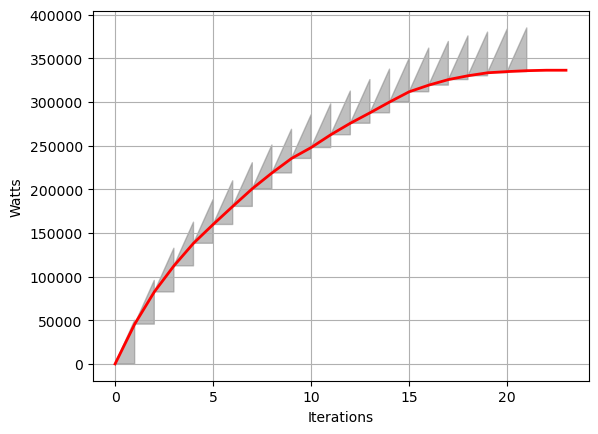

In [898]:
plt.fill_between(testdf['iteration'], testdf['envelope_min'], testdf['envelope_max'], color='gray', alpha=0.5)
plt.plot(testdf['iteration'], testdf['abm_value'], color='red', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Watts')
plt.grid(True)
plt.show()

In [899]:
testdf

,iteration,envelope_max,abm_value,envelope_min
0,0,0.000000,0.000000,0.000000
1,1,50000.000000,45562.736301,0.000000
2,1,45562.736301,45562.736301,45562.736301
3,2,95562.736301,82453.099083,45562.736301
4,2,82453.099083,82453.099083,82453.099083
5,3,132453.099083,112279.440162,82453.099083
6,3,112279.440162,112279.440162,112279.440162
7,4,162279.440162,138146.704841,112279.440162
8,4,138146.704841,138146.704841,138146.704841
9,5,188146.704841,159656.999495,138146.704841


In [900]:
# Create a line plot with error bars based on standard error from the mean

# Create a new dataframe with the mean and standard deviation of the ABM output
asdf_df = selected_rows[~selected_rows["TEACOS_output"].isna()].groupby(['test_name', 'iter'])['ABM_output'].agg(['mean', 'std', 'sem', 'count']).dropna().reset_index()
asdf_df

,test_name,iter,mean,std,sem,count
0,Tholen,0,45562.736301,7328.804110,1958.705288,14
1,Tholen,1,82453.099083,8756.997526,2340.406034,14
2,Tholen,2,112279.440162,6994.180508,1869.273369,14
3,Tholen,3,138146.704841,7990.730245,2135.612489,14
4,Tholen,4,159656.999495,8493.879383,2270.084753,14
5,Tholen,5,180346.276928,8620.023134,2303.798088,14
6,Tholen,6,200634.057583,10950.299748,2926.590710,14
7,Tholen,7,218626.150753,12781.255920,3415.934330,14
8,Tholen,8,235261.410936,12049.655505,3220.405895,14
9,Tholen,9,247721.978264,12050.816093,3220.716075,14


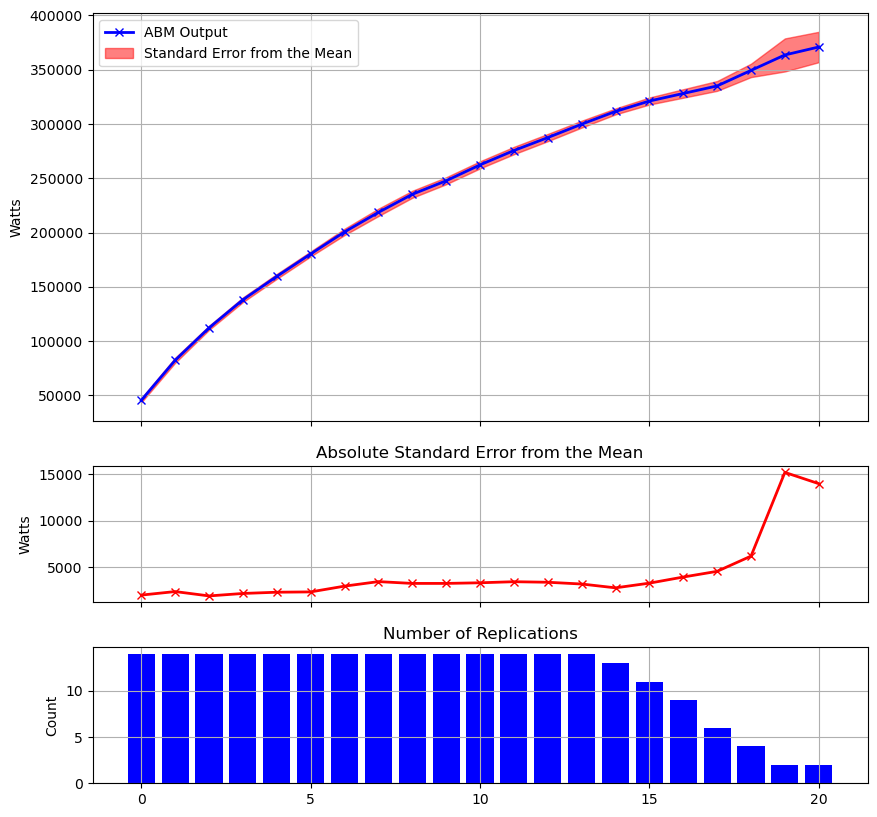

In [901]:
# Make separate slimmer subplot underneath to display sem

fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharex='all', gridspec_kw={'height_ratios': [3, 1, 1]})
ax[0].plot(asdf_df['iter'], asdf_df['mean'], color='blue', linewidth=2, marker='x')
ax[0].fill_between(asdf_df['iter'], asdf_df['mean'] - asdf_df['sem'], asdf_df['mean'] + asdf_df['sem'], color='red', alpha=0.5)
ax[0].set_ylabel('Watts')
ax[0].legend(['ABM Output', 'Standard Error from the Mean'])
ax[0].grid(True)

ax[1].plot(asdf_df['iter'], asdf_df['sem'], color='red', linewidth=2, marker='x')
ax[1].set_ylabel('Watts')
ax[1].set_title('Absolute Standard Error from the Mean')
ax[1].grid(True)

# Add bar plot with the 'count'
ax[2].bar(asdf_df['iter'], asdf_df['count'], color='blue')
ax[2].set_ylabel('Count')
ax[2].set_title('Number of Replications')
ax[2].grid(True)


In [902]:
# Give the formula for standard error from the mean
def sem(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))

In [903]:
iteration = [0]
envelope_max = [0]
envelope_min = [0]
abm_value = [0]

## include or exclude the values where TEACOS has stopped making a choice? Same for ABM values!!!


for i in range(1,24):
    iteration.append(i)
    envelope_max.append(cleaned_df[cleaned_df['iter'] == i]['TEACOS_output'].mean())
    abm_value.append(cleaned_df[cleaned_df['iter'] == i - 1]['ABM_output'].mean())
    # envelope_min.append(abm_value[i - 1])
    iteration.append(i)
    envelope_max.append(cleaned_df[cleaned_df['iter'] == i - 1]['ABM_output'].mean())
    abm_value.append(cleaned_df[cleaned_df['iter'] == i - 1]['ABM_output'].mean())
    # envelope_min.append(new_df[new_df['iter'] == i]['ABM_output'].mean())

iteration, envelope_max, abm_value, envelope_min

([0,
  1,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  5,
  5,
  6,
  6,
  7,
  7,
  8,
  8,
  9,
  9,
  10,
  10,
  11,
  11,
  12,
  12,
  13,
  13,
  14,
  14,
  15,
  15,
  16,
  16,
  17,
  17,
  18,
  18,
  19,
  19,
  20,
  20,
  21,
  21,
  22,
  22,
  23,
  23],
 [0,
  50000.0,
  45562.73630120612,
  50000.0,
  82453.09908328242,
  50000.0,
  112279.44016204528,
  50000.0,
  138146.70484083908,
  50000.0,
  159656.99949547672,
  50000.0,
  180346.27692838528,
  50000.0,
  200634.05758283995,
  50000.0,
  218626.1507525513,
  50000.0,
  235261.41093572226,
  50000.0,
  247721.97826430132,
  50000.0,
  262375.73192197835,
  50000.0,
  275558.78119406354,
  50000.0,
  287494.91139970924,
  50000.0,
  299845.33204155404,
  50000.0,
  311587.973020258,
  50000.0,
  321150.5351184156,
  50000.0,
  328117.837994765,
  50000.0,
  335053.9634982014,
  50000.0,
  349362.7988586916,
  50000.0,
  363598.13530639326,
  50000.0,
  370907.15337139834,
  nan,
  392214.1654827337,
  nan,
  nan],
 [0,


In [904]:
cleaned_df

,TEACOS_output,ABM_output,iterations,test_name,path,iter,iter_lowest
80,50000.0,45130.706694,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,0,16.0
81,50000.0,72663.932396,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,16.0
82,50000.0,111635.893273,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,2,16.0
83,50000.0,143987.205801,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,3,16.0
84,50000.0,164296.592727,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,4,16.0
...,...,...,...,...,...,...,...
776,50000.0,295874.753319,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,11,16.0
777,50000.0,308562.470907,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,12,16.0
778,50000.0,317089.658650,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,13,16.0
779,50000.0,330461.073590,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,14,16.0


In [905]:
testdf = pd.DataFrame({
    'iteration': iteration,
    'envelope_max': envelope_max,
    'abm_value': abm_value
})

new_max = [0]
for i in range(1, len(testdf["iteration"])):
    if i % 2 == 0:
        # print(cleaned_df["envelope_max"][i])
        new_max.append(testdf["envelope_max"][i])
    if i % 2 == 1:  # Check if the index is odd
        # print(cleaned_df["envelope_max"][i])
        c_sum = testdf["envelope_max"][i] + testdf["envelope_max"][i-1]
        new_max.append(c_sum)
        # print(c_sum)
        # envelope_max[i] = cumulative_sum
new_max

[0,
 50000.0,
 45562.73630120612,
 95562.73630120611,
 82453.09908328242,
 132453.0990832824,
 112279.44016204528,
 162279.4401620453,
 138146.70484083908,
 188146.70484083908,
 159656.99949547672,
 209656.99949547672,
 180346.27692838528,
 230346.27692838528,
 200634.05758283995,
 250634.05758283995,
 218626.1507525513,
 268626.1507525513,
 235261.41093572226,
 285261.4109357223,
 247721.97826430132,
 297721.9782643013,
 262375.73192197835,
 312375.73192197835,
 275558.78119406354,
 325558.78119406354,
 287494.91139970924,
 337494.91139970924,
 299845.33204155404,
 349845.33204155404,
 311587.973020258,
 361587.973020258,
 321150.5351184156,
 371150.5351184156,
 328117.837994765,
 378117.837994765,
 335053.9634982014,
 385053.9634982014,
 349362.7988586916,
 399362.7988586916,
 363598.13530639326,
 413598.13530639326,
 370907.15337139834,
 nan,
 392214.1654827337,
 nan,
 nan]

In [906]:
envelope_min = pd.concat([pd.Series([0]), testdf['abm_value']], ignore_index=True)
envelope_min

0          0.000000
1          0.000000
2      45562.736301
3      45562.736301
4      82453.099083
5      82453.099083
6     112279.440162
7     112279.440162
8     138146.704841
9     138146.704841
10    159656.999495
11    159656.999495
12    180346.276928
13    180346.276928
14    200634.057583
15    200634.057583
16    218626.150753
17    218626.150753
18    235261.410936
19    235261.410936
20    247721.978264
21    247721.978264
22    262375.731922
23    262375.731922
24    275558.781194
25    275558.781194
26    287494.911400
27    287494.911400
28    299845.332042
29    299845.332042
30    311587.973020
31    311587.973020
32    321150.535118
33    321150.535118
34    328117.837995
35    328117.837995
36    335053.963498
37    335053.963498
38    349362.798859
39    349362.798859
40    363598.135306
41    363598.135306
42    370907.153371
43    370907.153371
44    392214.165483
45    392214.165483
46              NaN
47              NaN
dtype: float64

In [907]:
testdf['envelope_min'] = envelope_min
testdf['envelope_max'] = new_max
testdf

,iteration,envelope_max,abm_value,envelope_min
0,0,0.000000,0.000000,0.000000
1,1,50000.000000,45562.736301,0.000000
2,1,45562.736301,45562.736301,45562.736301
3,2,95562.736301,82453.099083,45562.736301
4,2,82453.099083,82453.099083,82453.099083
5,3,132453.099083,112279.440162,82453.099083
6,3,112279.440162,112279.440162,112279.440162
7,4,162279.440162,138146.704841,112279.440162
8,4,138146.704841,138146.704841,138146.704841
9,5,188146.704841,159656.999495,138146.704841


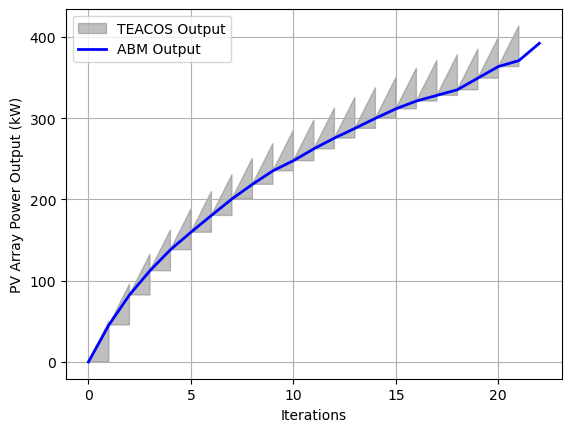

In [908]:
plt.fill_between(testdf['iteration'] , testdf['envelope_min'] / 1e3 , testdf['envelope_max'] / 1e3, color='gray', alpha=0.5, label="TEACOS Output")
plt.plot(testdf['iteration'], testdf['abm_value'] / 1e3, color='blue', linewidth=2, label="ABM Output")
plt.xlabel('Iterations')
plt.ylabel('PV Array Power Output (kW)')
plt.legend()
plt.grid(True)
plt.show()

In [909]:
values = [0.0, 50000.0, 100000.0, 150000.0, 200000.0, 250000.0, 300000.0, 350000.0, 400000.0, 0.0, 0.0, 0.0,
          0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TEACOS_base_case = pd.Series(values)
TEACOS_base_case
type(TEACOS_base_case[0])

numpy.float64

In [910]:
type(series_teacos_mm)

pandas.core.series.Series

In [911]:
series_teacos_mm

0          0.000000
1      95562.736301
2     132453.099083
3     162279.440162
4     188146.704841
5     209656.999495
6     230346.276928
7     250634.057583
8     268626.150753
9     285261.410936
10    297721.978264
11    312375.731922
12    325558.781194
13    337494.911400
14    349845.332042
15    361587.973020
16    371150.535118
17    378117.837995
18    385053.963498
19    399362.798859
20    413598.135306
Name: mean, dtype: float64

In [912]:
ser2 = pd.Series([0, 0, 0])

s = pd.concat([series_teacos_mm, pd.Series([0, 0, 0, 0], index=[22, 23, 24, 25])])
s

0          0.000000
1      95562.736301
2     132453.099083
3     162279.440162
4     188146.704841
5     209656.999495
6     230346.276928
7     250634.057583
8     268626.150753
9     285261.410936
10    297721.978264
11    312375.731922
12    325558.781194
13    337494.911400
14    349845.332042
15    361587.973020
16    371150.535118
17    378117.837995
18    385053.963498
19    399362.798859
20    413598.135306
22         0.000000
23         0.000000
24         0.000000
25         0.000000
dtype: float64

# Investment Trajectory

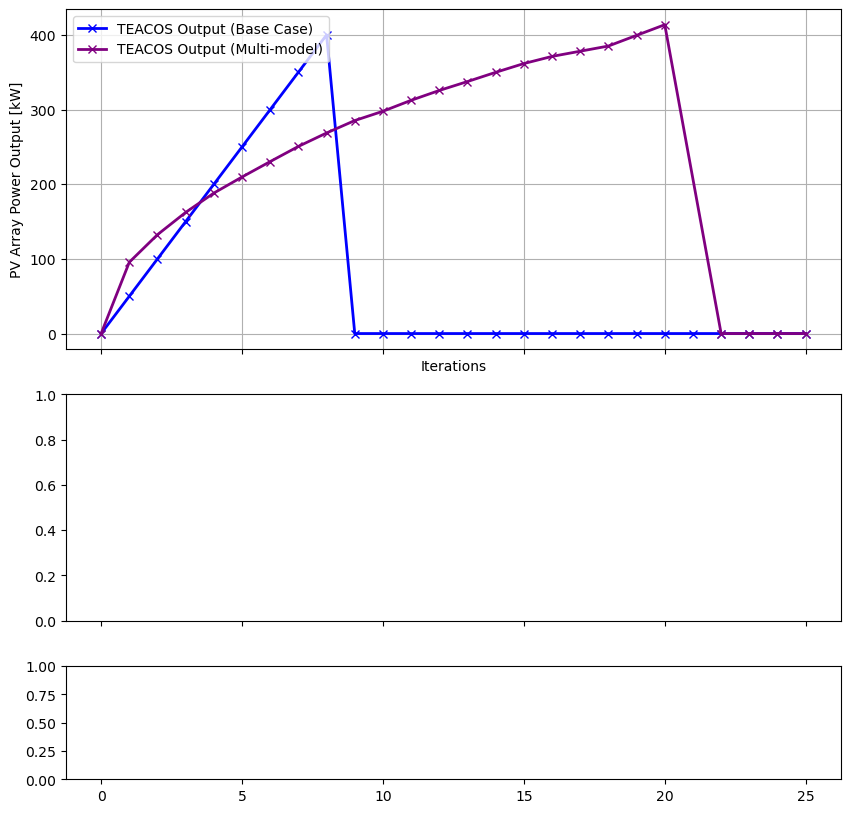

In [913]:
# Make separate slimmer subplot underneath to display sem

# TEACOS output multi-model series
series_teacos_mm = (asdf_df['mean'].shift(1) + 50e3).fillna(0)

fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharex='all', gridspec_kw={'height_ratios': [3, 2, 1]})
# ax[0].plot(asdf_df['iter'], asdf_df['mean'], color='black', linewidth=2, marker='x')
# ax[0].plot(new_df.groupby("iter")['TEACOS_output'].mean().cumsum().iloc[:22] / 1e3, color='blue', linewidth=2, marker='x', label = 'TEACOS Output (Base Case)')
ax[0].plot(TEACOS_base_case / 1e3, color='blue', linewidth=2, marker='x', label = 'TEACOS Output (Base Case)')
# ax[0].plot(asdf_df['iter'], asdf_df['mean'] / 1e3, color='black', linewidth=2, marker='x', label = 'ABM Output (Multi-model)')
ax[0].plot(s / 1e3, color="purple", linewidth=2, marker='x', label ="TEACOS Output (Multi-model)")
# ax[0].fill_between(asdf_df['iter'], asdf_df['mean'] - asdf_df['sem'], asdf_df['mean'] + asdf_df['sem'], color='red', alpha=0.5)
ax[0].set_ylabel('PV Array Power Output [kW]')
ax[0].legend(loc='upper left')
ax[0].set_xlabel('Iterations')
ax[0].grid(True)
# Save fig
fig.savefig("../figures/BaseCasevsMM.png", dpi=300)

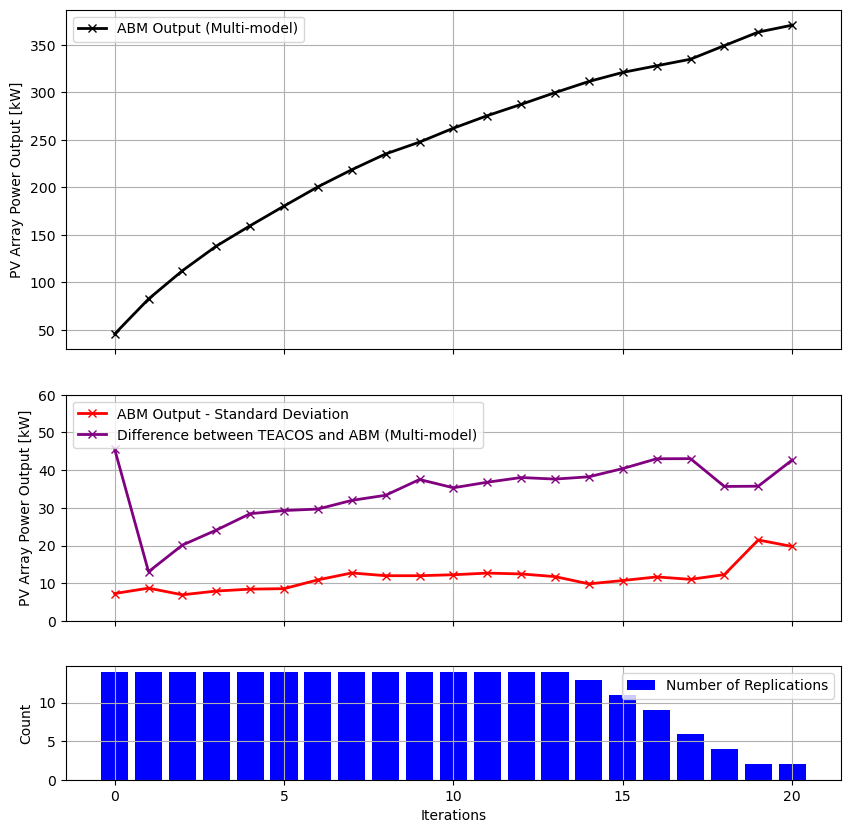

In [914]:
# Make separate slimmer subplot underneath to display sem

# TEACOS output multi-model series
series_teacos_mm = (asdf_df['mean'].shift(1) + 50e3).fillna(0)

fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharex='all', gridspec_kw={'height_ratios': [3, 2, 1]})
# ax[0].plot(asdf_df['iter'], asdf_df['mean'], color='black', linewidth=2, marker='x')
# ax[0].plot(new_df.groupby("iter")['TEACOS_output'].mean().cumsum().iloc[:22] / 1e3, color='blue', linewidth=2, marker='x', label = 'TEACOS Output (Base Case)')
# ax[0].plot(TEACOS_base_case / 1e3, color='blue', linewidth=2, marker='x', label = 'TEACOS Output (Base Case)')
ax[0].plot(asdf_df['iter'], asdf_df['mean'] / 1e3, color='black', linewidth=2, marker='x', label = 'ABM Output (Multi-model)')
# ax[0].plot(series_teacos_mm / 1e3, color="purple", linewidth=2, marker='x', label ="TEACOS Output (Multi-model)")
# ax[0].fill_between(asdf_df['iter'], asdf_df['mean'] - asdf_df['sem'], asdf_df['mean'] + asdf_df['sem'], color='red', alpha=0.5)
ax[0].set_ylabel('PV Array Power Output [kW]')
ax[0].legend(loc='upper left')
ax[0].grid(True)


ax[1].plot(asdf_df['iter'], asdf_df['std'] / 1e3, color='red', linewidth=2, marker='x', label='ABM Output - Standard Deviation')
# Difference between TEACOS and ABM (multi-model)
ax[1].plot((asdf_df['mean'] - series_teacos_mm).abs() / 1e3, color='purple', linewidth=2, marker='x', label='Difference between TEACOS and ABM (Multi-model)')
ax[1].set_ylabel('PV Array Power Output [kW]')
ax[1].legend(loc='upper left')
ax[1].grid(True)
ax[1].set_ylim(0, 60)

# Add bar plot with the 'count'

ax[2].bar(asdf_df['iter'], asdf_df['count'], color='blue', label='Number of Replications')
ax[2].set_ylabel('Count')
ax[2].set_xlabel('Iterations')
ax[2].legend(loc='upper right')
ax[2].grid(True)

# Save fig
fig.savefig("../figures/ABM_Output.png", dpi=300)

In [915]:
selected_rows.groupby('iter')["ABM_output"].mean()

iter
0      45562.736301
1      82453.099083
2     112279.440162
3     138146.704841
4     159656.999495
5     180346.276928
6     200634.057583
7     218626.150753
8     235261.410936
9     247721.978264
10    262375.731922
11    275558.781194
12    287494.911400
13    299845.332042
14    311579.023201
15    319187.608200
16    325528.841150
17    329907.168002
18    333320.303146
19    334679.272716
20    335723.418154
21    336245.490873
22    336245.490873
23    336245.490873
24    336245.490873
Name: ABM_output, dtype: float64

In [916]:
cv_df = agg_df.query("(iter == 1) & (test_name == 'Tholen') & (iterations == 25)")
cv_df

,TEACOS_output,ABM_output,iterations,test_name,path,iter,iter_lowest
81,50000.0,72663.932396,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,16.0
106,50000.0,89480.110368,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,1,17.0
171,50000.0,75493.724425,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,15.0
226,50000.0,93630.983247,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,14.0
291,50000.0,79539.905385,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,17.0
331,50000.0,81894.786449,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-02...,1,22.0
446,50000.0,77764.782268,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,18.0
471,50000.0,86178.336321,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,18.0
496,50000.0,98687.081515,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-03...,1,19.0
531,50000.0,78164.614274,25,Tholen,../output/Tholen_Iterations_25_Time_2023-06-05...,1,21.0


In [917]:

cv_df["ABM_output"].mean()

82453.09908328242